In [2]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('data.csv') # reading data using padas
print(data.head()) # first 5 rows of data
print(data.tail()) # last 5 rows of data

                    name online_order book_table  Rating  votes      location  \
0                  Jalsa          Yes        Yes     4.1    775  Banashankari   
1         Spice Elephant          Yes         No     4.1    787  Banashankari   
2        San Churro Cafe          Yes         No     3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No     3.7     88  Banashankari   
4          Grand Village           No         No     3.8    166  Basavanagudi   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   
3          Quick Bites      South Indian, North Indian   
4        Casual Dining        North Indian, Rajasthani   

   approx_cost(for two people) listed_in(type) listed_in(city)  
0                          800          Buffet    Banashankari  
1                          800    

In [4]:
data.shape # shape of data
data.info() # it give data type null count etc for all coulums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41263 entries, 0 to 41262
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41263 non-null  object 
 1   online_order                 41263 non-null  object 
 2   book_table                   41263 non-null  object 
 3   Rating                       41263 non-null  float64
 4   votes                        41263 non-null  int64  
 5   location                     41263 non-null  object 
 6   rest_type                    41263 non-null  object 
 7   cuisines                     41263 non-null  object 
 8   approx_cost(for two people)  41263 non-null  int64  
 9   listed_in(type)              41263 non-null  object 
 10  listed_in(city)              41263 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.5+ MB


In [5]:
data.isnull().sum() # checking how many values are missing

name                           0
online_order                   0
book_table                     0
Rating                         0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

we can see there are no missing value.

In [6]:
# Check for duplicates
print("Number of duplicates:", data.duplicated().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)

Number of duplicates: 73


In [7]:
# Clean rating column (ensure it's numeric)
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Clean price column (remove commas and convert to numeric)
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(str).str.replace(',', '')
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'], errors='coerce')

# Standardize location names
data['location'] = data['location'].str.strip().str.title()

# Clean restaurant types (split and explode for analysis)
data['rest_type'] = data['rest_type'].str.replace(', ', ',')

In [ ]:

data['Rating'] = data['Rating'].astype(float) # rating as float
data['votes'] = data['votes'].astype(int) # votes as int
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(float) # cost as float
data['online_order'] = data['online_order'].astype('category') # online order and book_table as catagory
data['book_table'] = data['book_table'].astype('category')

In [9]:
data.to_csv('zomato_cleaned.csv', index=False) # saving clean data

In [10]:
# Split cuisines into separate rows
cuisine_data = data.assign(cuisine=data['cuisines'].str.split(', ')).explode('cuisine')

# Group by cuisine
cuisine_stats = cuisine_data.groupby('cuisine').agg({
    'Rating': ['mean', 'count'],
    'votes': 'mean',
    'approx_cost(for two people)': 'mean'
}).reset_index()

# Flatten multi-index columns
cuisine_stats.columns = ['cuisine', 'avg_rating', 'restaurant_count', 'avg_votes', 'avg_price_for_two']

# Filter out insignificant cuisines (appearing in very few restaurants)
cuisine_stats = cuisine_stats[cuisine_stats['restaurant_count'] >= 5]

In [11]:
# Top 10 cuisines by rating
top_rated = cuisine_stats.sort_values('avg_rating', ascending=False).head(10)

# Top 10 cuisines by popularity (votes)
top_popular = cuisine_stats.sort_values('avg_votes', ascending=False).head(10)

# Top 10 restaurants overall
top_restaurants = data.sort_values(['Rating', 'votes'], ascending=[False, False]).head(10)[
    ['name', 'Rating', 'votes', 'cuisines', 'location']
]

In [12]:
# Price vs Rating analysis
price_bins = [0, 300, 600, 900, 1200, float('inf')]
price_labels = ['<300', '300-600', '600-900', '900-1200', '1200+']
data['price_range'] = pd.cut(data['approx_cost(for two people)'], bins=price_bins, labels=price_labels)

price_rating = data.groupby('price_range').agg({
    'Rating': 'mean',
    'votes': 'mean'
}).reset_index()

# Online order vs rating
online_rating = data.groupby('online_order').agg({
    'Rating': 'mean',
    'votes': 'mean'
}).reset_index()

C:\Users\ASIS VIVOBOOJK\AppData\Local\Temp\ipykernel_24572\562804578.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_rating = data.groupby('price_range').agg({
C:\Users\ASIS VIVOBOOJK\AppData\Local\Temp\ipykernel_24572\562804578.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  online_rating = data.groupby('online_order').agg({


<Figure size 1200x600 with 0 Axes>

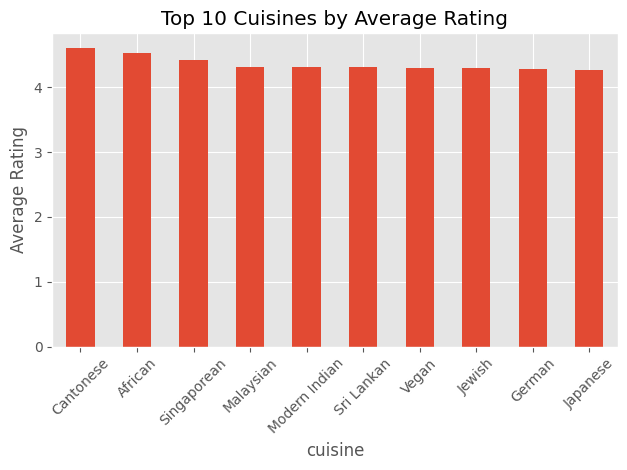

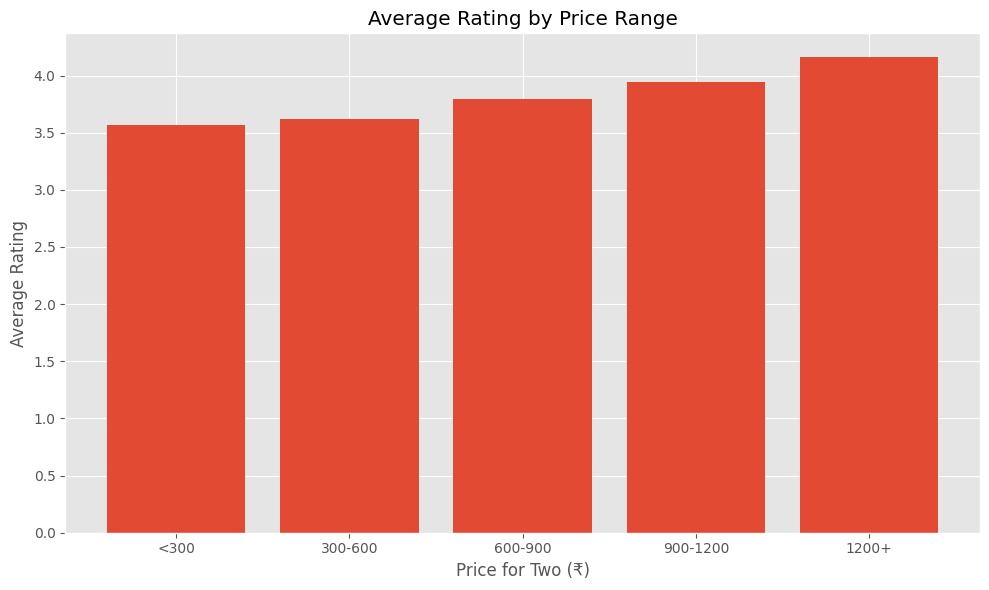

<Figure size 800x600 with 0 Axes>

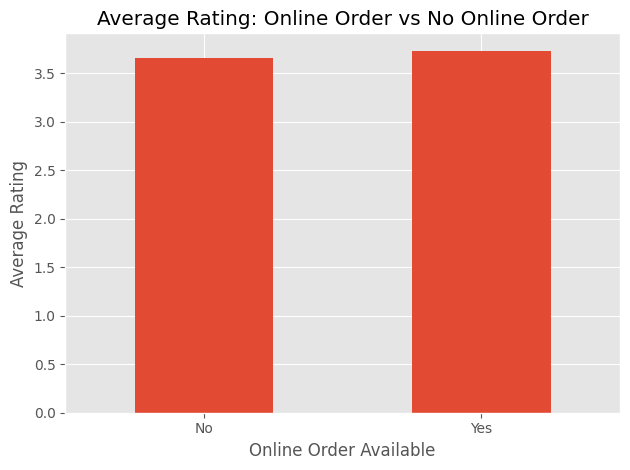

<Figure size 1200x800 with 0 Axes>

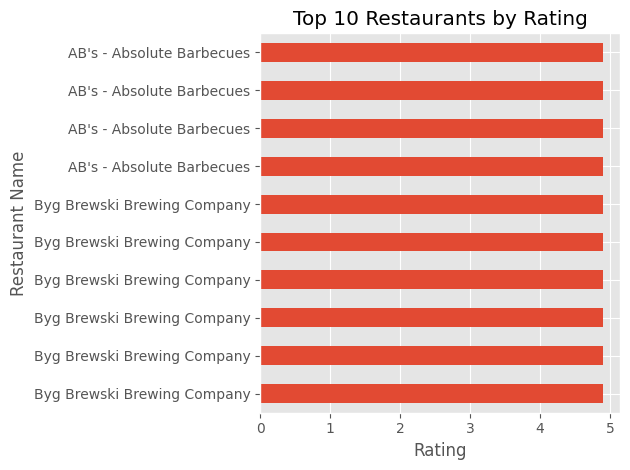

In [13]:
plt.style.use('ggplot')

# Figure 1: Top cuisines by rating
plt.figure(figsize=(12, 6))
top_rated.plot(kind='bar', x='cuisine', y='avg_rating', legend=False)
plt.title('Top 10 Cuisines by Average Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_cuisines_rating.png')
plt.show()

# Figure 2: Rating distribution by price range
plt.figure(figsize=(10, 6))
plt.bar(price_rating['price_range'], price_rating['Rating'])
plt.title('Average Rating by Price Range')
plt.xlabel('Price for Two (₹)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig('rating_by_price.png')
plt.show()

# Figure 3: Online vs Offline restaurants
plt.figure(figsize=(8, 6))
online_rating.plot(kind='bar', x='online_order', y='Rating', legend=False)
plt.title('Average Rating: Online Order vs No Online Order')
plt.xlabel('Online Order Available')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('online_vs_rating.png')
plt.show()

# Figure 4: Top restaurants (horizontal bar)
plt.figure(figsize=(12, 8))
top_restaurants.head(10).sort_values('Rating').plot(
    kind='barh', x='name', y='Rating', legend=False
)
plt.title('Top 10 Restaurants by Rating')
plt.xlabel('Rating')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.savefig('top_restaurants.png')
plt.show()